In [1]:
import pandas as pd
import numpy as np
import csv

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.datasets.base import Bunch

In [2]:
df = pd.read_csv('./dataset/listings2.csv', encoding='Latin-1')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",...,f,NaN,NaN,f,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,20181206022948,2018-12-06,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181206022948,2018-12-06,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,20181206022948,2018-12-06,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.51


In [4]:
list(df)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49056 entries, 0 to 49055
Data columns (total 96 columns):
id                                  49056 non-null int64
listing_url                         49056 non-null object
scrape_id                           49056 non-null int64
last_scraped                        49056 non-null object
name                                49039 non-null object
summary                             47140 non-null object
space                               34354 non-null object
description                         48522 non-null object
experiences_offered                 49056 non-null object
neighborhood_overview               29889 non-null object
notes                               20013 non-null object
transit                             30935 non-null object
access                              28549 non-null object
interaction                         27835 non-null object
house_rules                         29660 non-null object
thumbnail_url          

## Cleaning

In [6]:
# drop columns
df.drop(['scrape_id', 'last_scraped', 'experiences_offered', 'host_response_rate', 'host_acceptance_rate', 
        'weekly_price', 'monthly_price','requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready'], axis=1)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,...,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","Diverse. Great coffee shops and restaurants, n...",NaN,"Yes! B, C, and 1 trains are within 5 minute w...",Guests have access to the whole apartment: wi...,...,10.0,10.0,10.0,10.0,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,...,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",...,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,I love that the neighborhood is safe to walk a...,NaN,You have access to local trains and express li...,guest will have access to the common living qu...,...,10.0,10.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1,0.51
5,3330,https://www.airbnb.com/rooms/3330,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",Location is GREAT!! Right off the L train in t...,We would very much appreciate it if you give u...,You will be STEPS AWAY FROM THE L TRAIN. Hop o...,The apartment is equipped with full kitchen (m...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,3,0.35
6,21794,https://www.airbnb.com/rooms/21794,COZY QUIET room 4 DOOGLERS!,"It's comfy & has a loft bed & a chaise lounge,...",This is the smaller room of the two I have ava...,"It's comfy & has a loft bed & a chaise lounge,...",GREAT Central Location. On 15th street between...,Chelsea is a great area of town central to eve...,Central location. The A and CC 8th ave subway ...,Your own very private room immediately when th...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.25
7,3647,https://www.airbnb.com/rooms/3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,NaN
8,22911,https://www.airbnb.com/rooms/22911,The Stuydio Modern and Light Filled,"Make your NY story in our welcoming, home away...",Welcome to The Stuydio! As featured in The New...,"Make your NY story in our welcoming, home away...","Beautiful and hi

In [7]:
# drop $ and , 
df['price'] = df['price'].astype(str).str.replace('$', '')
df['price'] = df['price'].astype(str).str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = df['price'].astype(float)
df['price']

0         59.0
1        140.0
2        149.0
3        225.0
4         89.0
5         70.0
6        111.0
7        150.0
8        125.0
9         60.0
10        89.0
11       175.0
12        80.0
13       125.0
14        65.0
15       185.0
16       240.0
17        60.0
18        79.0
19       500.0
20        79.0
21       101.0
22       220.0
23       126.0
24       125.0
25       150.0
26       139.0
27       135.0
28       110.0
29       100.0
         ...  
49026     45.0
49027    115.0
49028     85.0
49029    125.0
49030     36.0
49031    250.0
49032     69.0
49033    195.0
49034    100.0
49035    250.0
49036     65.0
49037    118.0
49038     99.0
49039    205.0
49040     70.0
49041     35.0
49042     35.0
49043    115.0
49044    150.0
49045    138.0
49046     58.0
49047    200.0
49048    178.0
49049    120.0
49050    288.0
49051     60.0
49052     65.0
49053    135.0
49054    350.0
49055     60.0
Name: price, Length: 49056, dtype: float64

In [8]:
# dates
df['host_since_year'] = pd.DatetimeIndex(df['host_since']).year
df['host_since_year'].dropna()

0        2008.0
1        2009.0
2        2008.0
3        2008.0
4        2010.0
5        2008.0
6        2010.0
7        2008.0
8        2010.0
9        2009.0
10       2008.0
11       2009.0
12       2009.0
13       2010.0
14       2009.0
15       2009.0
16       2010.0
17       2009.0
18       2009.0
19       2010.0
20       2009.0
21       2010.0
22       2010.0
23       2009.0
24       2010.0
25       2009.0
26       2010.0
27       2009.0
28       2009.0
29       2010.0
          ...  
49026    2018.0
49027    2016.0
49028    2016.0
49029    2018.0
49030    2013.0
49031    2011.0
49032    2017.0
49033    2018.0
49034    2018.0
49035    2015.0
49036    2018.0
49037    2013.0
49038    2015.0
49039    2014.0
49040    2015.0
49041    2016.0
49042    2016.0
49043    2014.0
49044    2014.0
49045    2013.0
49046    2016.0
49047    2018.0
49048    2013.0
49049    2013.0
49050    2013.0
49051    2016.0
49052    2018.0
49053    2018.0
49054    2012.0
49055    2016.0
Name: host_since_year, L

In [9]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [10]:
df.shape

(49056, 97)

In [11]:
import numpy as np
import csv
from sklearn.datasets.base import Bunch

# Univariate Statistics

In [12]:
import math

median_beds = math.floor(df.beds.median())
median_bedrooms = math.floor(df.bedrooms.median())
median_bathrooms = math.floor(df.bathrooms.median())

df['beds'] = df['beds'].fillna(value=median_beds)
df['bedrooms'] = df['bedrooms'].fillna(value=median_bedrooms)
df['bathrooms'] = df['bathrooms'].fillna(value=median_bathrooms)

df_data = df.loc[df['neighbourhood_cleansed'] == 'Williamsburg']

df_features = df_data[['neighbourhood_cleansed','accommodates', 'beds', 'bedrooms', 'bedrooms']]

print(df_features)
print(df_data['price'])

      neighbourhood_cleansed  accommodates  beds  bedrooms  bedrooms
5               Williamsburg             2   1.0       1.0       1.0
21              Williamsburg             2   1.0       1.0       1.0
26              Williamsburg             4   2.0       1.0       1.0
38              Williamsburg             3   1.0       1.0       1.0
40              Williamsburg             1   1.0       1.0       1.0
48              Williamsburg             2   1.0       1.0       1.0
49              Williamsburg             4   2.0       1.0       1.0
53              Williamsburg             6   4.0       3.0       3.0
73              Williamsburg             4   2.0       2.0       2.0
75              Williamsburg             2   1.0       1.0       1.0
87              Williamsburg             2   0.0       0.0       0.0
93              Williamsburg             2   1.0       1.0       1.0
104             Williamsburg             1   1.0       1.0       1.0
105             Williamsburg      

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
%matplotlib inline

df_features = df_data[['accommodates', 'beds', 'bedrooms', 'bathrooms']]

df_target = df_data['price']

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(df_features), 2))

X_w_noise = np.hstack([df_features, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, df_target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape))
print('X_train_selected.shape is: {}'.format(X_train_selected.shape))


X_train.shape is: (2051, 6)
X_train_selected.shape is: (2051, 3)


[ True  True  True False False False]


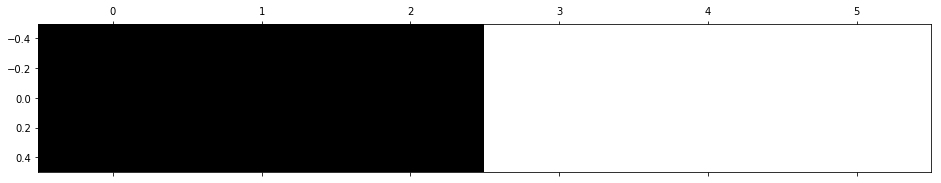

In [14]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [15]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('The score of Logistic Regression on all features: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)
print('The score of Logistic Regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The score of Logistic Regression on all features: 0.065


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The score of Logistic Regression on the selected features: 0.068


# Model Based Feature Selection

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [17]:
select.fit(X_train, y_train)
X_train_s = select.transform(X_train)
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

The shape of X_train is:  (2051, 6)
The shape of X_train_s is  (2051, 3)


[ True False False False  True  True]


Text(0.5, 0, 'Index of Features')

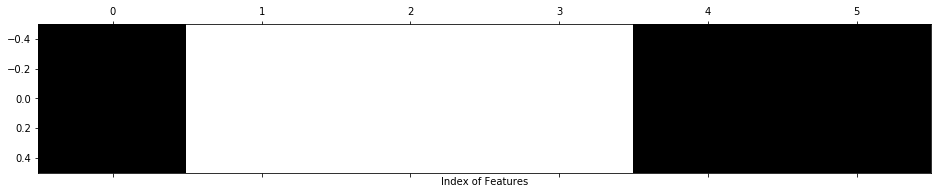

In [18]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

In [19]:
X_test_s = select.transform(X_test)
score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('The score of Logistic Regression with the selected features on the test set: {:.3f}'.format(score))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The score of Logistic Regression with the selected features on the test set: 0.060


# Random Forest 

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [21]:
df_features[0:4]

,accommodates,beds,bedrooms,bathrooms
5,2,1.0,1.0,1.0
21,2,1.0,1.0,2.0
26,4,2.0,1.0,1.0
38,3,1.0,1.0,1.0


In [22]:
print(df_target)

5         70.0
21       101.0
26       139.0
38       140.0
40       150.0
48        90.0
49       299.0
53       295.0
73       150.0
75        90.0
87       132.0
93        80.0
104      105.0
105      199.0
112      160.0
114      195.0
122       80.0
137      125.0
150      249.0
151       69.0
165      140.0
174       69.0
180       65.0
205       59.0
226       60.0
241      120.0
243       60.0
247      140.0
250       95.0
259      150.0
         ...  
48663    150.0
48676    180.0
48680    100.0
48725     55.0
48729     80.0
48804    200.0
48812    200.0
48819     70.0
48844    160.0
48848     65.0
48864     40.0
48880    150.0
48890    175.0
48892    200.0
48917     80.0
48944    375.0
48946    111.0
48948    250.0
48952    175.0
48955    295.0
48975     90.0
48993    114.0
48995    175.0
48997    105.0
49004     70.0
49019    150.0
49020     70.0
49029    125.0
49031    250.0
49054    350.0
Name: price, Length: 4103, dtype: float64


In [23]:
feat_labels = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.4, random_state=0)

In [25]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('accommodates', 0.33250353056608584)
('beds', 0.24451620738426413)
('bedrooms', 0.21124624846527512)
('bathrooms', 0.211734013584377)


In [26]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.15)

In [27]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

accommodates
beds
bedrooms
bathrooms


In [28]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [29]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.058465286236297195

In [31]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.058465286236297195

In [32]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
